In [1]:
import os
import json
import itertools
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cf

import shapely.geometry as sg

from scipy.optimize import curve_fit

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append(os.path.abspath(".."))
from function import ART_downscale as ART_down
from function import ART_preprocessing as ART_pre

In [2]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite','3_DOWN')

In [3]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    VENETO = gpd.read_file(os.path.join(veneto_dir,'Veneto.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [4]:
data = xr.open_dataset(os.path.join(dir_base,'VENETO_DOWN_IMERG_3h_2002_2012_npix_3.nc'))
data
lat = data.lat.values
lon = data.lon.values
lon2d, lat2d = np.meshgrid(lon, lat)
Tr = data.Tr.values

Nd3 = data.Nd.values
Cd3 = data.Cd.values
Wd3 = data.Wd.values

print(Tr)
Nd3.shape

[ 10  20  50 100]


(11, 25, 30)

In [5]:
data = xr.open_dataset(os.path.join(dir_base,'VENETO_DOWN_IMERG_3h_2002_2012_npix_5_v2.nc'))

Nd5 = data.Nd.values
Cd5 = data.Cd.values
Wd5 = data.Wd.values

print(data.Tr.values)
Nd5.shape

[  5  10  20  50 100 200]


(11, 25, 30)

In [6]:
data = xr.open_dataset(os.path.join(dir_base,'VENETO_DOWN_IMERG_3h_2002_2012_npix_7.nc'))

Nd7 = data.Nd.values
Cd7 = data.Cd.values
Wd7 = data.Wd.values

print(data.Tr.values)
Nd7.shape

[ 10  20  50 100]


(11, 25, 30)

In [7]:
Cmin = np.min([np.nanmin(Cd3),np.nanmin(Cd5),np.nanmin(Cd7)])
Cmax = np.max([np.nanmax(Cd3),np.nanmax(Cd5),np.nanmax(Cd7)])
print(Cmin, Cmax)

5.13446881091071 23.670521210637308


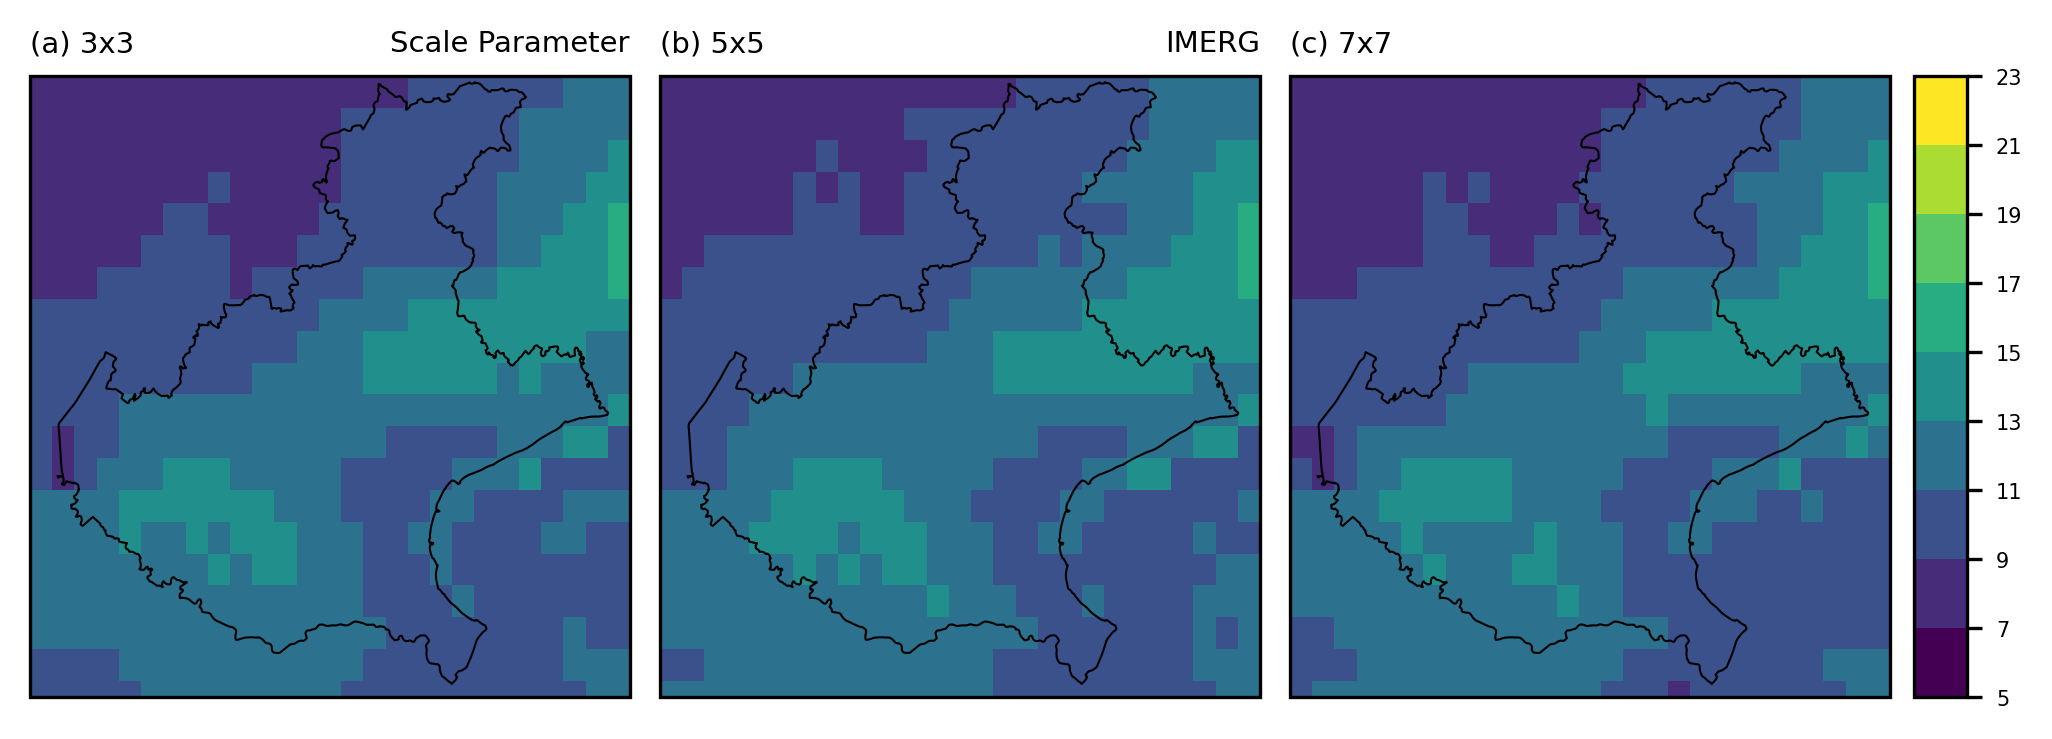

In [8]:
levels_obs = np.arange(int(Cmin),int(Cmax)+2,2)
C_norm = mcolors.BoundaryNorm(boundaries=levels_obs, ncolors=256)

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,3)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, np.nanmean(Cd3,axis=0), norm=C_norm)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(a) 3x3', fontsize=7, loc='left')
ax1.set_title(f'Scale Parameter', fontsize=7, loc='right')

# ============================================================================================================================
dif = np.nanmean(Cd7,axis=0)-np.nanmean(Cd5,axis=0)
Cd_update = np.nanmean(Cd5,axis=0)+dif/1.2

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, Cd_update, norm=C_norm)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(b) 5x5', fontsize=7, loc='left')
ax1.set_title(f'IMERG', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, np.nanmean(Cd7,axis=0), norm=C_norm)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(c) 7x7', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(wspace=0.05, hspace=0)

cbar_ax = fig.add_axes([0.91, 0.15, 0.022, 0.69])#0.91
cbar = plt.colorbar(a1, cax=cbar_ax, ticks= None, orientation='vertical')
cbar.ax.tick_params(labelsize=5)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

In [9]:
Wmin = np.min([np.nanmin(Wd3),np.nanmin(Wd5),np.nanmin(Wd7)])
Wmax = np.max([np.nanmax(Wd3),np.nanmax(Wd5),np.nanmax(Wd7)])
print(Wmin, Wmax)

0.5117329120596824 1.7293100503546264


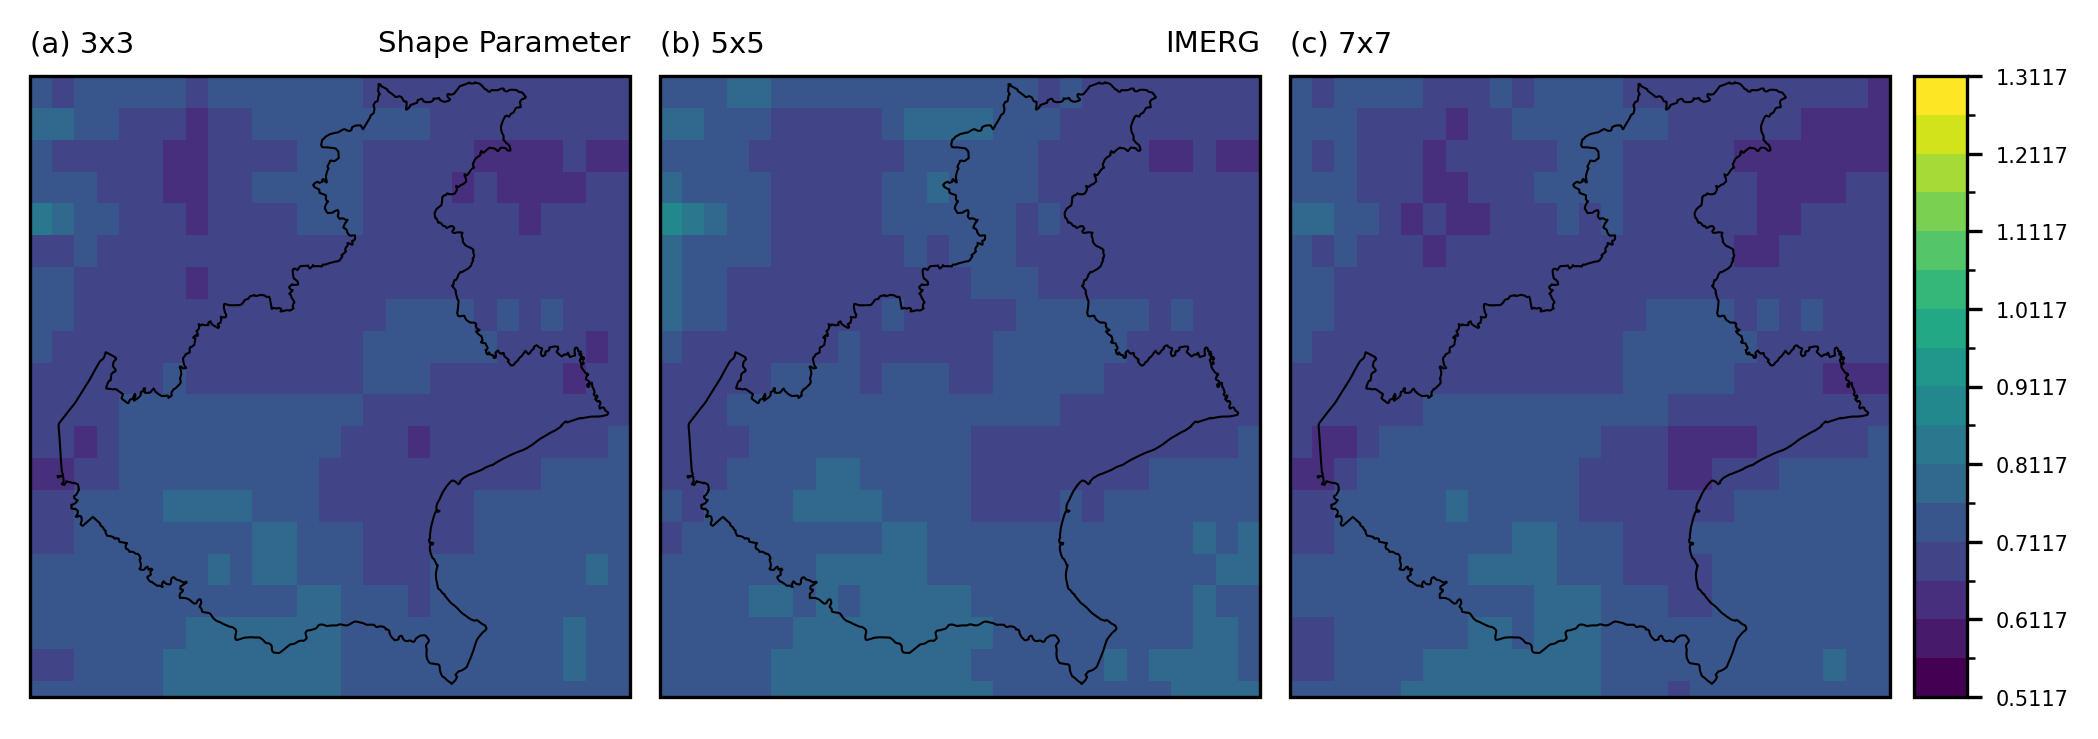

In [10]:
levels_obs = np.arange(Wmin,1.35,0.05)
W_norm = mcolors.BoundaryNorm(boundaries=levels_obs, ncolors=256)

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,3)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, np.nanmean(Wd3,axis=0), norm=W_norm)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(a) 3x3', fontsize=7, loc='left')
ax1.set_title(f'Shape Parameter', fontsize=7, loc='right')

# ============================================================================================================================
dif = np.nanmean(Wd7,axis=0)-np.nanmean(Wd5,axis=0)
Wd_update = np.nanmean(Wd5,axis=0)+dif/1.2

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, Wd_update, norm=W_norm)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(b) 5x5', fontsize=7, loc='left')
ax1.set_title(f'IMERG', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, np.nanmean(Wd7,axis=0), norm=W_norm)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(c) 7x7', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(wspace=0.05, hspace=0)

cbar_ax = fig.add_axes([0.91, 0.15, 0.022, 0.69])#0.91
cbar = plt.colorbar(a1, cax=cbar_ax, ticks= None, orientation='vertical')
cbar.ax.tick_params(labelsize=5)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

## Extreme Quantiles

In [11]:
Tr = [10, 50, 100]

In [12]:
Qd3 = ART_down.pre_quantiles_array(Nd3, Cd3, Wd3, Tr, lat, lon, 1)
Qd5 = ART_down.pre_quantiles_array(Nd5, Cd5, Wd5, Tr, lat, lon, 1)
Qd7 = ART_down.pre_quantiles_array(Nd7, Cd7, Wd7, Tr, lat, lon, 1)

In [13]:
Qmin = np.min([np.nanmin(Qd3[1,:,:]),np.nanmin(Qd5[1,:,:]),np.nanmin(Qd7[1,:,:])])
Qmax = np.max([np.nanmax(Qd3[1,:,:]),np.nanmax(Qd5[1,:,:]),np.nanmax(Qd7[1,:,:])])
print(Wmin, Wmax)

0.5117329120596824 1.7293100503546264


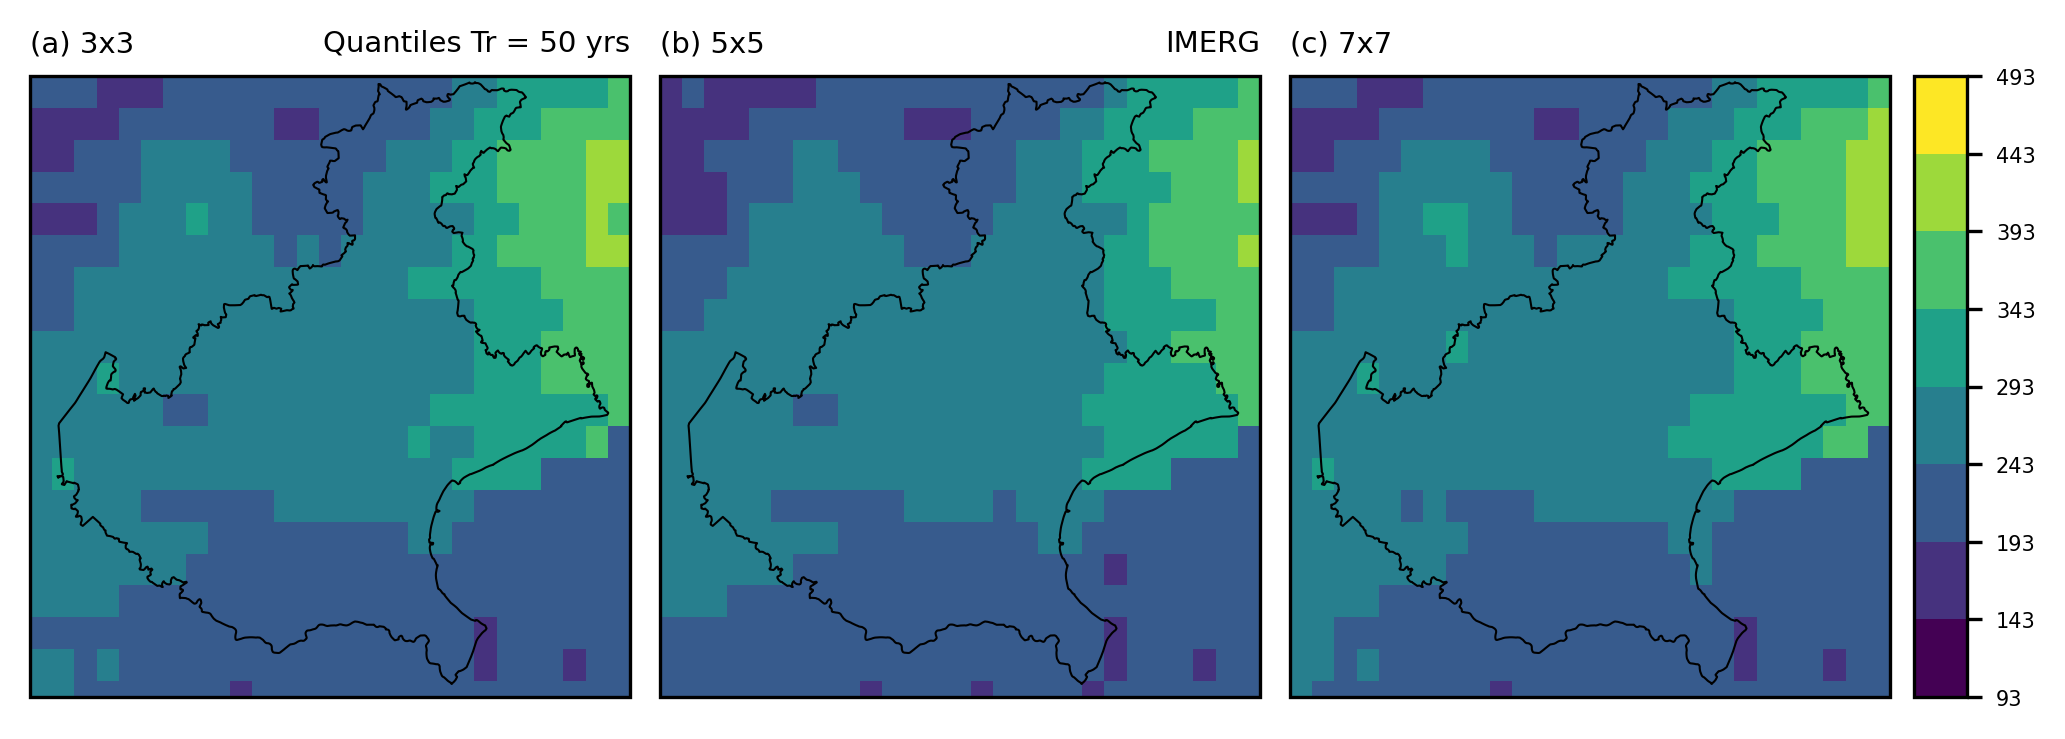

In [14]:
levels_obs = np.arange(int(Qmin),int(Qmax)+50,50)
W_norm = mcolors.BoundaryNorm(boundaries=levels_obs, ncolors=256)

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,3)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, Qd3[1,:,:], norm=W_norm)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(a) 3x3', fontsize=7, loc='left')
ax1.set_title(f'Quantiles Tr = 50 yrs', fontsize=7, loc='right')

# ============================================================================================================================
dif = Qd7[1,:,:]-Qd5[1,:,:]
Qd5_update = Qd5[1,:,:]+dif/1.2

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, Qd5_update, norm=W_norm)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(b) 5x5', fontsize=7, loc='left')
ax1.set_title(f'IMERG', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, Qd7[1,:,:], norm=W_norm)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(c) 7x7', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(wspace=0.05, hspace=0)

cbar_ax = fig.add_axes([0.91, 0.15, 0.022, 0.69])#0.91
cbar = plt.colorbar(a1, cax=cbar_ax, ticks= None, orientation='vertical')
cbar.ax.tick_params(labelsize=5)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

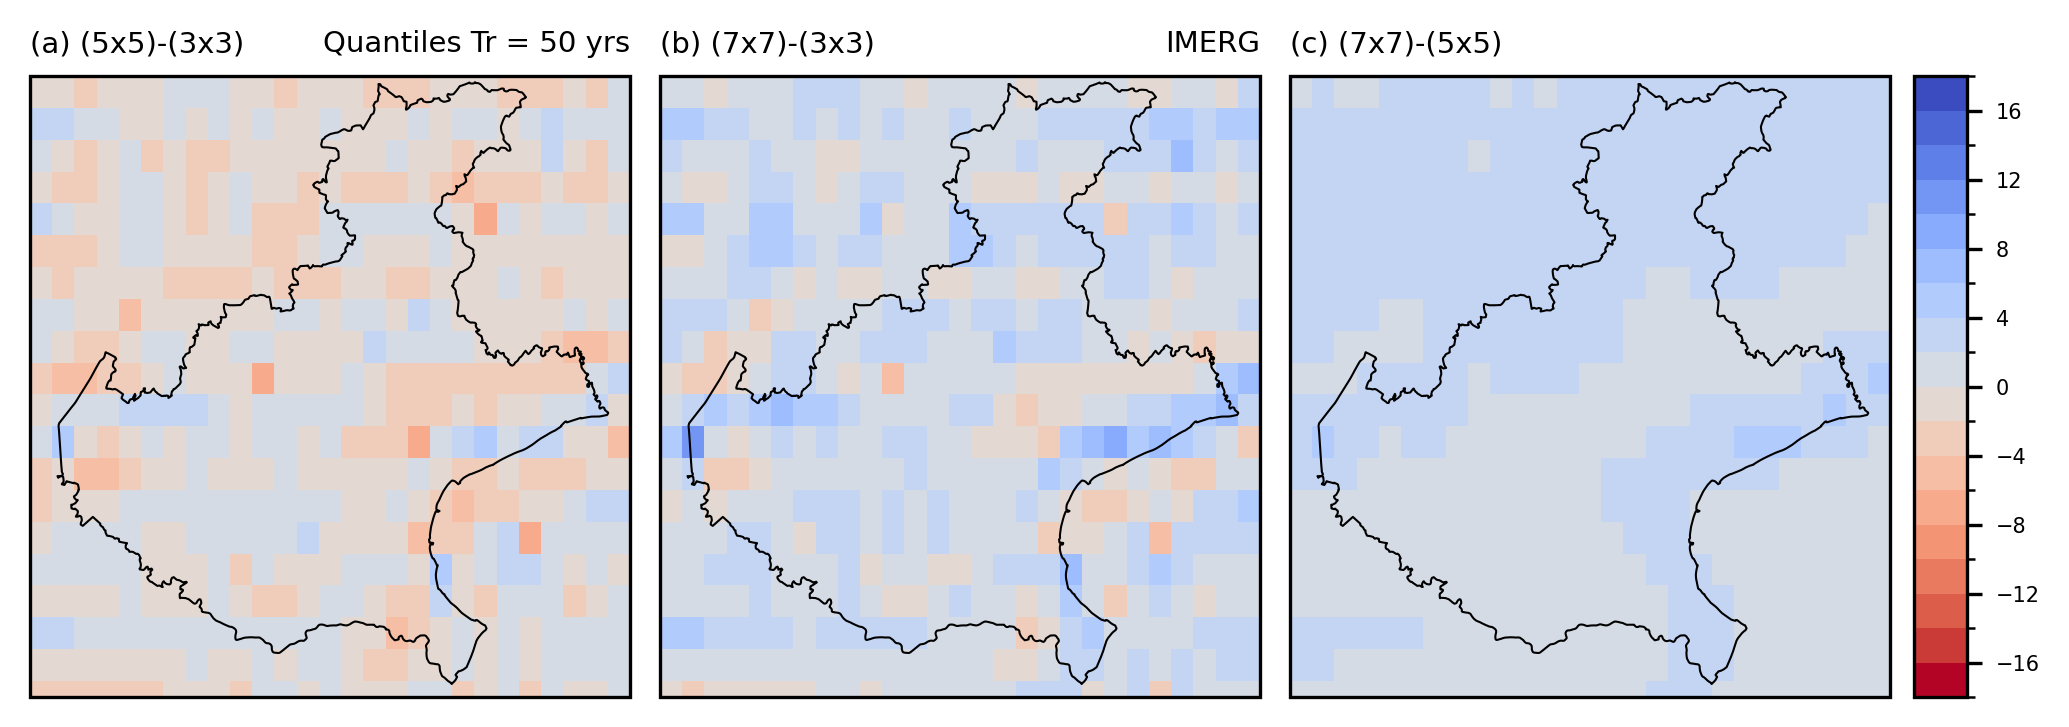

In [15]:
levels_obs = np.arange(-18,18+2,2)
W_norm = mcolors.BoundaryNorm(boundaries=levels_obs, ncolors=256)

cmap = plt.cm.coolwarm_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,3)

dif = Qd7[1,:,:]-Qd5[1,:,:]
Qd5_update = Qd5[1,:,:]+dif/1.05

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, Qd5_update-Qd3[1,:,:], norm=W_norm, cmap=cmap)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(a) (5x5)-(3x3)', fontsize=7, loc='left')
ax1.set_title(f'Quantiles Tr = 50 yrs', fontsize=7, loc='right')

# ============================================================================================================================

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, Qd7[1,:,:]-Qd3[1,:,:], norm=W_norm, cmap=cmap)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(b) (7x7)-(3x3)', fontsize=7, loc='left')
ax1.set_title(f'IMERG', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, Qd7[1,:,:]-Qd5_update, norm=W_norm, cmap=cmap)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(c) (7x7)-(5x5)', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(wspace=0.05, hspace=0)

cbar_ax = fig.add_axes([0.91, 0.15, 0.022, 0.69])#0.91
cbar = plt.colorbar(a1, cax=cbar_ax, ticks= None, orientation='vertical')
cbar.ax.tick_params(labelsize=5)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

In [16]:
dif_5_3 = Qd5_update-Qd3[1,:,:]
dif_7_3 = Qd7[1,:,:]-Qd3[1,:,:]
dif_7_5 = Qd7[1,:,:]-Qd5_update

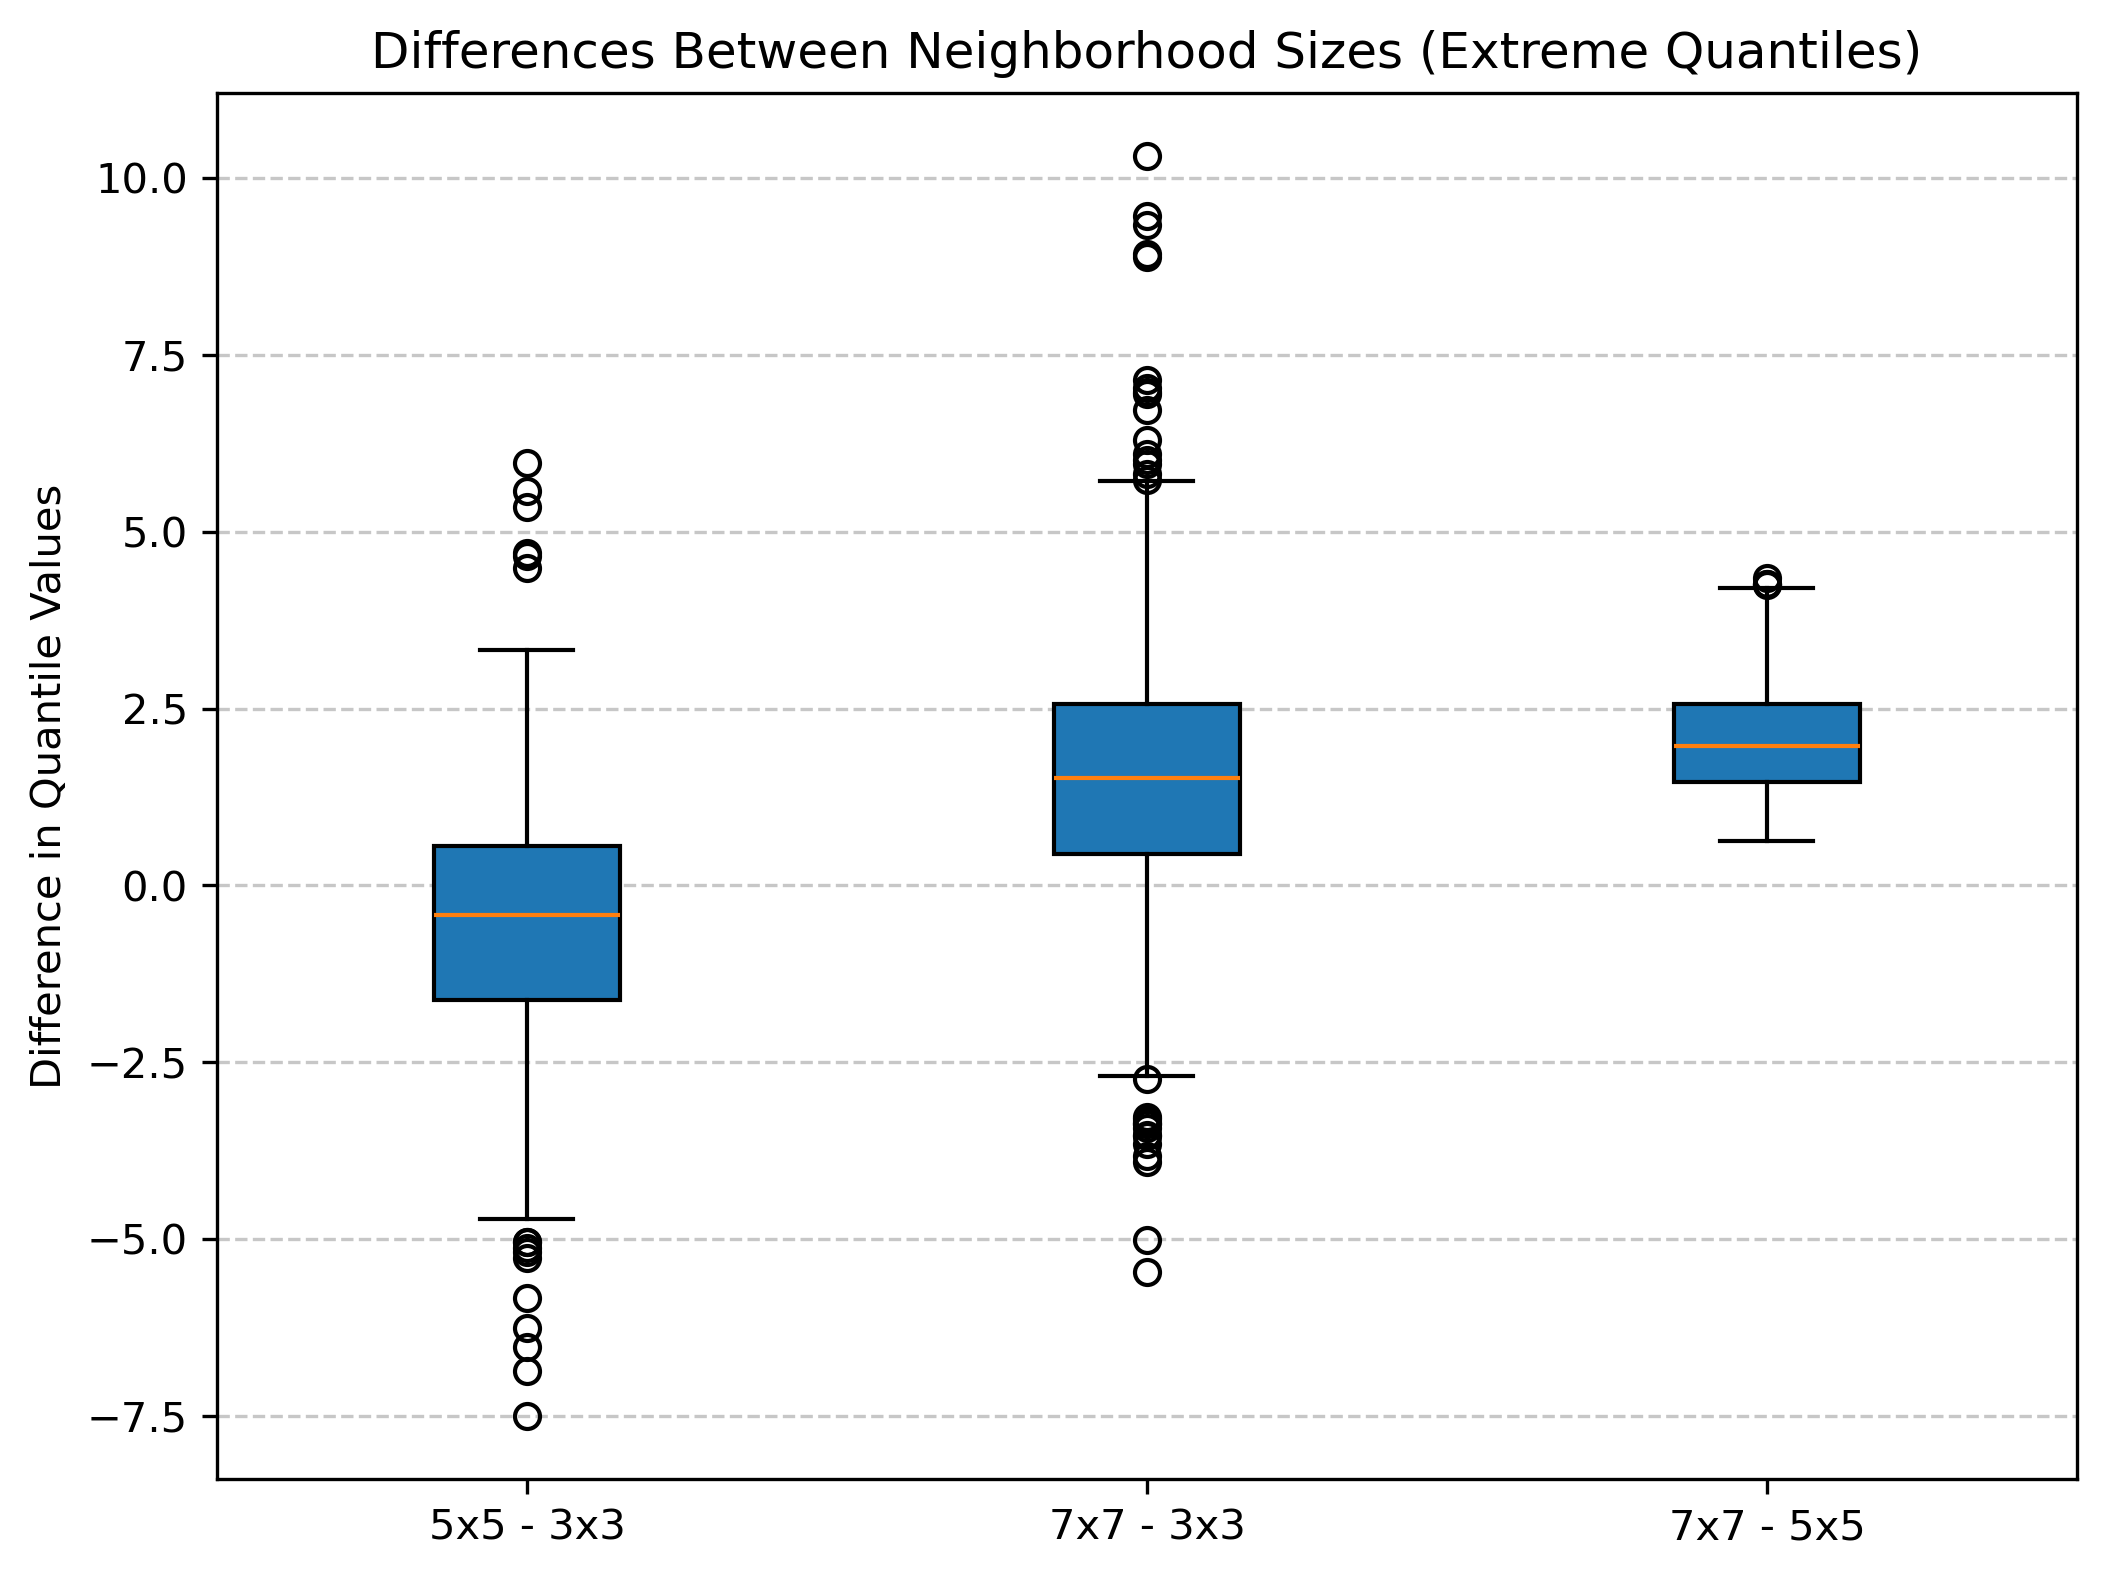

In [17]:
# Asegúrate de aplanar los arrays para el boxplot
data = [
    (Qd5_update - Qd3[1, :, :]).ravel(),
    (Qd7[1, :, :] - Qd3[1, :, :]).ravel(),
    (Qd7[1, :, :] - Qd5_update).ravel()
]

labels = ['5x5 - 3x3', '7x7 - 3x3', '7x7 - 5x5']

fig = plt.figure(figsize=(8,6),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0])
ax1.boxplot(data, labels=labels, patch_artist=True)

ax1.set_title('Differences Between Neighborhood Sizes (Extreme Quantiles)')
ax1.set_ylabel('Difference in Quantile Values')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

In [18]:
dir_obs = os.path.join('/','media','arturo','Arturo','Data','Italy')

In [19]:
OBS_base = os.path.join(dir_obs,'stations','data')
OBS_INFO_dir = os.path.join(os.path.join(OBS_base),'Weibull','Veneto_INFO.csv')

if os.path.exists(OBS_INFO_dir):
    wa_pd = pd.read_csv(OBS_INFO_dir, sep=',')
else:
    raise SystemExit(f"File not found: {OBS_INFO_dir}")
print(len(wa_pd))

205


In [20]:
total_years = np.arange(1980,2024)
print(f'Quantiles for period: {1980} to {2024}')
N_array = np.zeros([len(wa_pd),len(total_years)])
C_array = np.zeros([len(wa_pd),len(total_years)])
W_array = np.zeros([len(wa_pd),len(total_years)])

for nn in range(len(wa_pd)):
    filename = f'{wa_pd['File_Name'].values[nn]}'
    Weibull_OBS = pd.read_csv(os.path.join(OBS_base,'Weibull','Veneto',filename))

    for count, YY in enumerate(total_years):
        N_ = Weibull_OBS[Weibull_OBS['Year'] == YY]['N'].values
        C_ = Weibull_OBS[Weibull_OBS['Year'] == YY]['C'].values
        W_ = Weibull_OBS[Weibull_OBS['Year'] == YY]['W'].values
        if len(N_) == 0:
            N_array[nn,count] = np.nan
            C_array[nn,count] = np.nan
            W_array[nn,count] = np.nan
        else:
            if N_[0] == 0:
                N_array[nn,count] = np.nan
                C_array[nn,count] = np.nan
                W_array[nn,count] = np.nan
            else:
                N_array[nn,count] = float(N_[0])
                C_array[nn,count] = float(C_[0])
                W_array[nn,count] = float(W_[0])

Quantiles for period: 1980 to 2024


In [21]:
yy_s, yy_e = 2002, 2012
years_num = yy_e - yy_s + 1

# # Veneto
lon_min, lon_max, lat_min, lat_max, toll = 10.5, 13.5, 44.5, 47, 0.002

In [22]:
print(f'Extract Parameters for: {yy_s} to {yy_e}')
N_df = pd.DataFrame(data=N_array,columns=total_years)
N_df = N_df.loc[:,yy_s:yy_e]
N_df.insert(0, 'filename', wa_pd['File_Name'].values)
N_df.insert(1, 'Lat', wa_pd['Lat'].values)
N_df.insert(2, 'Lon', wa_pd['Lon'].values)

C_df = pd.DataFrame(data=C_array,columns=total_years)
C_df = C_df.loc[:,yy_s:yy_e]
C_df.insert(0, 'filename', wa_pd['File_Name'].values)
C_df.insert(1, 'Lat', wa_pd['Lat'].values)
C_df.insert(2, 'Lon', wa_pd['Lon'].values)

W_df = pd.DataFrame(data=W_array,columns=total_years)
W_df = W_df.loc[:,yy_s:yy_e]
W_df.insert(0, 'filename', wa_pd['File_Name'].values)
W_df.insert(1, 'Lat', wa_pd['Lat'].values)
W_df.insert(2, 'Lon', wa_pd['Lon'].values)

print(len(W_df))

Extract Parameters for: 2002 to 2012
205


In [23]:
Tr = np.array([10, 20, 50, 100, 200])
Fi = 1 - 1/Tr
# Q_obs = np.zeros([len(wa_pd), len(Tr)])
Q_obs = []
File_, Lat_, Lon_, YYS_, YYE_, NY_ = [], [], [], [], [], []

count = 0
for nn in range(len(wa_pd)):
    N_ = N_df.loc[:,yy_s:yy_e].values[nn]
    C_ = C_df.loc[:,yy_s:yy_e].values[nn]
    W_ = W_df.loc[:,yy_s:yy_e].values[nn]
    
    if len(W_[~np.isnan(W_)]) >= years_num: # Number of years between yy_s to yy_e
        # print(nn,len(W_[~np.isnan(W_)]), len(W_))

        File_.append(wa_pd['File_Name'][nn])
        Lat_.append(wa_pd['Lat'][nn])
        Lon_.append(wa_pd['Lon'][nn])
        YYS_.append(yy_s)
        YYE_.append(yy_e)
        NY_.append(years_num - np.sum(np.isnan(N_)))

        x0 = np.nanmean(C_)
        TMP_Q, flags = ART_down.mev_quant_update(Fi, x0, N_, C_, W_, thresh=1)
        TMP_Q = np.where(flags==True,TMP_Q,np.nan)
        Q_obs.append(TMP_Q)
        
        count = count + 1

Q_obs_matrix = np.array(Q_obs)

new_df = pd.DataFrame(Q_obs_matrix, columns=['Q10','Q20','Q50','Q100','Q200'])
new_df.insert(0, 'File_Name', File_)
new_df.insert(1, 'Lat', Lat_)
new_df.insert(2, 'Lon', Lon_)
new_df.insert(3, 'YYS', YYS_)
new_df.insert(4, 'YYE', YYE_) 
new_df.insert(5, 'NY', NY_)

clear_df = new_df[new_df['NY']==years_num]
clear_df = new_df[new_df['NY'] == years_num].reset_index(drop=True)

print(len(clear_df))

166


In [24]:
lon_min_rect, lon_max_rect = lon_min, lon_max
lat_min_rect, lat_max_rect = lat_min, lat_max

# Crear un polígono rectangular
rectangle = sg.Polygon([
    (lon_min_rect, lat_min_rect),
    (lon_max_rect, lat_min_rect),
    (lon_max_rect, lat_max_rect),
    (lon_min_rect, lat_max_rect),
    (lon_min_rect, lat_min_rect)  # Cerrar el polígono
])

rect_gdf = gpd.GeoDataFrame(geometry=[rectangle], crs="EPSG:4326")

In [25]:
wa_gdf = gpd.GeoDataFrame(clear_df, geometry=gpd.points_from_xy(clear_df['Lon'], clear_df['Lat']), crs="EPSG:4326")
wa_inside_rect = gpd.sjoin(wa_gdf, rect_gdf, how="inner", predicate="within")
wa_inside_rect = wa_inside_rect.drop(columns=['index_right'])

QOBS_area_mean = np.nanmean(wa_inside_rect.iloc[:,6:-1].values,axis=0)
QOBS_area_mean

array([124.78456844, 145.02725483, 172.88151984, 195.00602144,
       218.12437725])

Text(1.0, 1.0, '2002 to 2012')

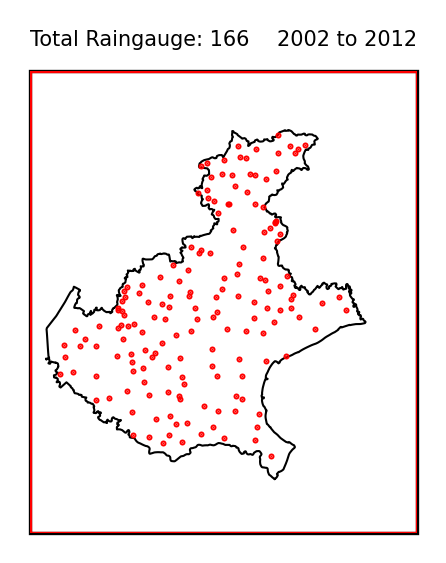

In [26]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,2),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
# ax1.set_extent([10.5, 13.5, 44.5, 47],crs=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
# ITALY.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
# ax1.scatter(lon_ERA5, lat_ERA5,s=1,c='grey',alpha=0.4)
rect_gdf.plot(ax=ax1, edgecolor='r', facecolor='none', linewidth=0.8, zorder=15)
ax1.scatter(wa_inside_rect['Lon'].values, wa_inside_rect['Lat'].values, s=0.2, c='r', zorder=20, label='Stations')
ax1.set_title(f'Total Raingauge: {len(wa_inside_rect)}', fontsize=5, loc='left')
ax1.set_title(f'{yy_s} to {yy_e}', fontsize=5, loc='right')

In [27]:
IMERG_Qd3, IMERG_Qd5, IMERG_Qd7 = [], [], []
IMERG_lat_obs, IMERG_lon_obs = [], []

for nn in range(len(wa_gdf)):
    Q_OBS = wa_gdf['Q50'].values[nn]
    lat_obs = wa_gdf['Lat'].values[nn]
    lon_obs = wa_gdf['Lon'].values[nn]
    
    # =======================================================================
    # IMERG
    distances = ART_pre.haversine(lat2d, lon2d, lat_obs, lon_obs)
    min_index = np.unravel_index(np.argmin(distances, axis=None), distances.shape)

    IMERG_lat_ = lat[min_index[0]]
    IMERG_lon_ = lon[min_index[1]]

    IMERG_Qd3.append(Qd3[1,min_index[0],min_index[1]])
    IMERG_Qd5.append(Qd5[1,min_index[0],min_index[1]])
    IMERG_Qd7.append(Qd7[1,min_index[0],min_index[1]])

    IMERG_lat_obs.append(IMERG_lat_)
    IMERG_lon_obs.append(IMERG_lon_)

In [28]:
DF_data = pd.DataFrame({
        'OBS_lat':wa_gdf['Lat'].values,
        'OBS_lon':wa_gdf['Lon'].values,
        'OBS_Q50':wa_gdf['Q50'].values,
        'IMERG_lat':IMERG_lat_obs,
        'IMERG_lon':IMERG_lon_obs,
        'IMERG_Qd3':IMERG_Qd3,
        'IMERG_Qd5':IMERG_Qd5,
        'IMERG_Qd7':IMERG_Qd7,
        })

In [29]:
IMERG_QE3 = (DF_data['IMERG_Qd3']-DF_data['OBS_Q50'])/DF_data['OBS_Q50']
IMERG_QE5 = (DF_data['IMERG_Qd5']-DF_data['OBS_Q50'])/DF_data['OBS_Q50']
IMERG_QE7 = (DF_data['IMERG_Qd7']-DF_data['OBS_Q50'])/DF_data['OBS_Q50']

In [30]:
colors = ['royalblue','r', 'g', 'c', 'y', 'purple', 'orange', 'cyan']

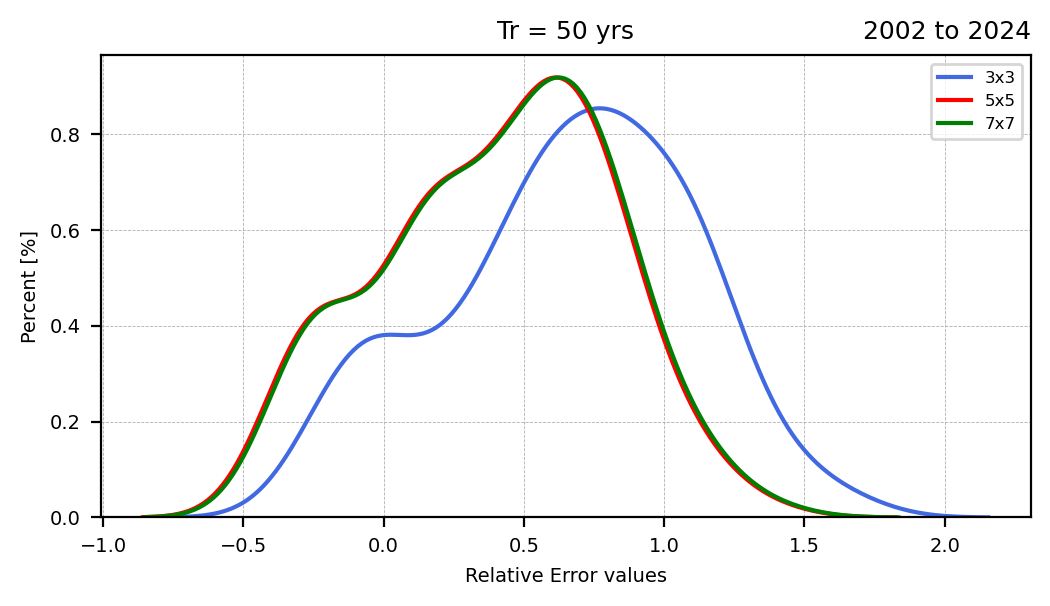

In [39]:
fig = plt.figure(figsize=(6,3),dpi=200)
gs = gridspec.GridSpec(1,1)

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 0])

sns.kdeplot(IMERG_QE3,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'3x3')
sns.kdeplot(IMERG_QE5,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'5x5')
sns.kdeplot(IMERG_QE5+0.01,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'7x7')

ax1.set_ylabel('Percent [%]',fontsize=7)
ax1.set_xlabel('Relative Error values',fontsize=7)
ax1.legend(fontsize=6, loc=0, ncol=1)
ax1.grid(linewidth=0.3, linestyle='--')
# ax1.set_xlim(-1.5,1.5)
# ax1.set_ylim(0,3.5)
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title(f'Tr = 50 yrs',fontsize=9, loc='Center')
ax1.set_title(f'{yy_s} to 2024',fontsize=9, loc='right')

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

In [32]:
IMERG_Qd5

[np.float64(159.1788623532768),
 np.float64(173.71609623948422),
 np.float64(173.71609623948422),
 np.float64(164.98188940498255),
 np.float64(196.45491606429619),
 np.float64(180.9395342299203),
 np.float64(237.1579353154411),
 np.float64(207.39293299223004),
 np.float64(241.57654282944364),
 np.float64(176.3830241720809),
 np.float64(183.05836570829922),
 np.float64(183.05836570829922),
 np.float64(209.76981105084815),
 np.float64(229.1397325072955),
 np.float64(200.4273365309813),
 np.float64(212.1107012615052),
 np.float64(248.25216274766717),
 np.float64(253.8748200731139),
 np.float64(248.1864450059805),
 np.float64(216.20888232891213),
 np.float64(213.09636124702155),
 np.float64(220.5821448003439),
 np.float64(238.01694642582726),
 np.float64(213.37864740132537),
 np.float64(196.32113202806568),
 np.float64(211.4291029758743),
 np.float64(159.1788623532768),
 np.float64(230.59948042528097),
 np.float64(221.11839288269982),
 np.float64(236.0732795490829),
 np.float64(189.5659959